# **Converting images to bitmap and string format**

Images are represented in computer in the form of an 8-bit matrix where each matrix element, known as a pixel has values ranging from 0 to 255 representing the different pixel intensities. With the help of a threshold function images can be converted to bitmaps where each pixel can only have two values, 0 or 255. All pixel intensities below the decided threshold value are deemed 0 and those above the threshold are deemed 255. This basically convers the image to binary format, where black pixels are assigned ‘0’ and white pixels are assigned ‘255’.  

image1 in a bitmap: 



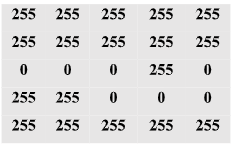

In [6]:
from IPython.display import Image
Image("C:/Users/Aparna/Pictures/s1.png")

image2 in a bitmap: 

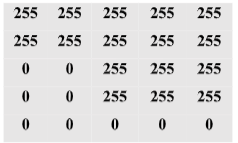

In [8]:
from IPython.display import Image
Image('C:/Users/Aparna/Pictures/s2.png')

Since Mapper function accepts input stored in files, the bitmap images are required to be converted to String format, to supply input as text. String format of images are defined as each pixel column separated by a comma ’,’ character and each pixel row is separated by a semicolon ‘;’ character.  

String format representation of image1: 

**“255,255,255,255,255;255,255,255,255,255;0,0,0,255,0;255,255,0,0,0;255,255,255,255,255"**

String format representation of image2: 

**“255,255,255,255,255;255,255,255,255,255;0,0,255,255,255;0,0,255,255,255;0,0,0,0,0”** 

In [ ]:
import cv2

def threshold_image(image, threshold):
    # Convert image to grayscale if it's not already in grayscale
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to convert the image to a binary format
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    
    return binary_image

# Example usage
image_path = "C:/Users/Aparna/Downloads/i1.jpg"
threshold_value = 150

# Read the image
image = cv2.imread(image_path)

# Apply thresholding to convert the image to a binary format
binary_image = threshold_image(image, threshold_value)

# Display the original image and the binary image
cv2.imshow("Original Image", image)
cv2.imshow("Binary Image", binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Creating new spaces for images
The images are defined in a new space, so that all possible matching cases between the two images can be calculated. This is the first mapper function.

 Input: Image1_Str Image2_Str

 Output: Image1_Str Image2_New_Space

For each image pair, the width and height of image1 is added around of the image2 as white pixels. Since image1 and image2 are 5X5 size images, thus the width of image1 (5 pixels) and height of image1 (5 pixels) is added to the width and height around image2, resulting in Image2_New_Space has a 13x13 size.

Image2_New_Space in a bitmap:

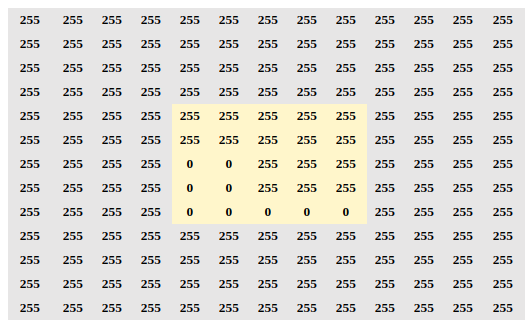

In [9]:
Image('C:/Users/Aparna/Pictures/s3.png')

In [1]:
import cv2
import numpy as np

def binary_image_to_string(binary_image):
    # Convert the binary image to a string format
    string_image = np.where(binary_image == 0, '0', '255').astype(str)
    
    # Join the elements of each row with a space separator
    string_image = [' '.join(row) for row in string_image]
    
    # Join the rows with a newline character
    string_image = '\n'.join(string_image)
    
    return string_image

# Example usage
binary_image_path1 = "C:/Users/Aparna/Downloads/i1.jpg"
output_file_path1 = "C:/Users/Aparna/Downloads/output1.txt"
binary_image_path2 = "C:/Users/Aparna/Downloads/i2.jpg"
output_file_path2 = "C:/Users/Aparna/Downloads/output2.txt"

# Read the binary image
binary_image1 = cv2.imread(binary_image_path1, cv2.IMREAD_GRAYSCALE)
binary_image2 = cv2.imread(binary_image_path2, cv2.IMREAD_GRAYSCALE)

# Convert the binary image to a string format
string_image1 = binary_image_to_string(binary_image1)
string_image2 = binary_image_to_string(binary_image2)

# Save the string representation to a text file
with open(output_file_path1, 'w') as f:
    f.write(string_image1)
with open(output_file_path2,'w') as f:
    f.write(string_image2)

print("String representations  are saved to:", output_file_path1,output_file_path2, end='\n')

String representations  are saved to: C:/Users/Aparna/Downloads/output1.txt C:/Users/Aparna/Downloads/output2.txt


# **Calculation of maximum number of black pixel overlaps between the images and the largest intersection coordinate for combining the images**

The Image2_New_Space is defined such that it can test for all possible combinations of image1 and image2. The image1 matrix is thus traversed over the image2 matrix and the overlapping black pixels are counted. The elements of image1 are considered as a floating frame on image2(in new space). Black pixels in common indices are counted where one-to-one matching occurs between the first image and the second image.  

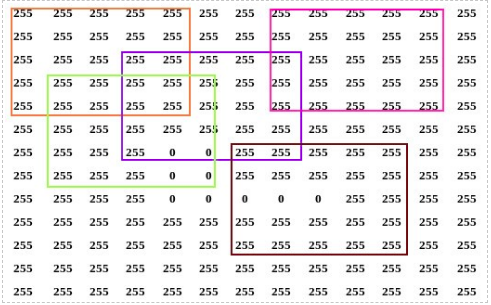

In [6]:
from IPython.display import Image
Image('C:/Users/Aparna/Pictures/s4.png')

As shown in the above figure, the elements of the image1 matrix are matched with 5X5 matrices each marked with a different color in the second image matrix. This operation is performed for all 5X5 matrices defined in the Image2_New_Space matrix and common black pixels are counted for each pairing state. 

The output of the reduce function gives us the maximum number of black pixel overlaps. The maximum number of lack pixel overlaps are found to be 3. Using this information, the largest intersection coordinate is obtained. For the Image2_New_Space, the largest intersection coordinate with respect to image1 is calculated as (6,6) 

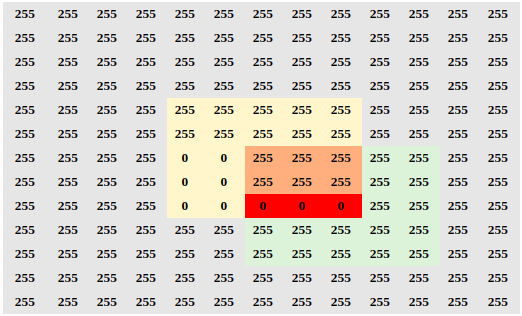

In [7]:
from IPython.display import Image
Image('C:/Users/Aparna/Pictures/s5.png')

In [9]:
def mapper(image1_str, image2_str):
    # Convert the image strings to matrices
    image1 = [[int(pixel) for pixel in row.split()] for row in image1_str.split('\n')]
    image2 = [[int(pixel) for pixel in row.split()] for row in image2_str.split('\n')]

    # Calculate the dimensions of the new space
    new_space_width = len(image2[0]) + len(image1[0]) - 1
    new_space_height = len(image2) + len(image1) - 1

    # Create the new space image
    image2_new_space = []
    for i in range(new_space_height):
        row = []
        for j in range(new_space_width):
            if i < len(image1) and j < len(image1[0]):
                # Add image1 pixels to the top-left corner
                row.append(image1[i][j])
            else:
                # Add image2 pixels to the remaining area
                row.append(image2[i - len(image1)][j - len(image1[0])])
        image2_new_space.append(row)

    # Count the overlapping black pixels
    overlapping_pixels = 0
    for i in range(len(image1)):
        for j in range(len(image1[0])):
            if image1[i][j] == 0 and image2_new_space[i][j] == 0:
                overlapping_pixels += 1

    # Emit key-value pair for the reducer phase
    yield image1_str, image2_new_space, overlapping_pixels
with open("C:/Users/Aparna/Downloads/output1.txt", 'r') as file:
    file_content1 = file.read()
with open("C:/Users/Aparna/Downloads/output2.txt", 'r') as file:
    file_content2 = file.read()
    
# Assign the file contents to a variable
image1_str = file_content1
image2_str = file_content2
print(mapper(image1_str, image2_str))

# Call the mapper function and store the generator object
from itertools import islice

# Call the mapper function and store the generator object
result_generator = mapper(image1_str, image2_str)

# Define the chunk size for processing the output
chunk_size = 1

# Process and display the output in chunks
while True:
    chunk = list(islice(result_generator, chunk_size))
    if not chunk:
        break
    for value in chunk:
        print(value)
        
def reducer(image1_str, image2_new_space_str):
    
    # Convert the image strings to matrices
    image1 = [[int(pixel) for pixel in row.split()] for row in image1_str.split('\n')]
    image2_new_space = [[int(pixel) for pixel in row.split()] for row in image2_new_space_str.split('\n')]

    # Calculate the maximum number of black pixel overlaps
    max_overlaps = 0
    for i in range(len(image1)):
        for j in range(len(image1[0])):
            if image1[i][j] == 0 and image2_new_space[i][j] == 0:
                max_overlaps += 1

    # Return the maximum number of black pixel overlaps
    return max_overlaps

# Call the mapper function and store the generator object
result_generator = mapper(image1_str, image2_str)

# Open a file for writing the output
with open("C:/Users/Aparna/Downloads/output3.txt", "w") as file:
    
    # Iterate over the generator and write the yielded values to the file
    for value in result_generator:
        file.write(str(value) + "\n")

<generator object mapper at 0x000002608E101CF0>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Using the obtained coordinate from the reduce functions, a merge operation is used to obtain the stitched image. The size of the merged image is defined as (3a-2) x (3b-2), where the size of the images is (a x b).

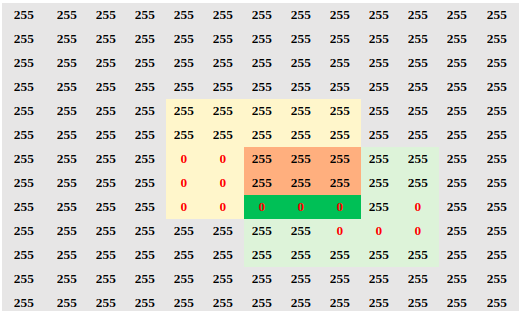

In [8]:
from IPython.display import Image
Image('C:/Users/Aparna/Pictures/s6.png')

In [11]:
def merge_images(image1_str, image2_new_space_str):
    # Convert the image strings to matrices
    image1 = [[int(pixel) for pixel in row.split()] for row in image1_str.split('\n')]
    image2_new_space = [[int(pixel) for pixel in row.split()] for row in image2_new_space_str.split('\n')]

    # Get the dimensions of the merged image
    merged_width = len(image2_new_space[0])
    merged_height = len(image2_new_space)

    # Create the merged image
    merged_image = []
    for i in range(merged_height):
        row = []
        for j in range(merged_width):
            if i < len(image1) and j < len(image1[0]):
                # Add pixels from image1 to the top-left corner
                row.append(image1[i][j])
            else:
                # Add pixels from the new space image
                row.append(image2_new_space[i][j])
        merged_image.append(row)

    # Convert the merged image matrix back to a string
    merged_image_str = '\n'.join([' '.join(map(str, row)) for row in merged_image])

    return merged_image_str

# Example usage
with open("C:/Users/Aparna/Downloads/output1.txt", 'r') as file:
    file_content1 = file.read()

with open("C:/Users/Aparna/Downloads/output2.txt", 'r') as file:
    file_content2 = file.read()

# Call the reducer function to obtain the merged image
merged_image_str = merge_images(file_content1, file_content2)

# Save the merged image to a file
with open("C:/Users/Aparna/Downloads/merged_image.txt", "w") as file:
    file.write(merged_image_str)
